# Assignment on Clustering Problem 1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
Data=pd.ExcelFile("E:\\New folder\\python\\EastWestAirlines.xlsx")

In [2]:
df=pd.read_excel(Data, 'data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


## Normalization function 

In [4]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [5]:
norm_data=norm(df.iloc[:,1:])

In [6]:
norm_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [7]:
from scipy.cluster.hierarchy import linkage

In [8]:
import scipy.cluster.hierarchy as sch

In [9]:
sch.dendrogram?

In [10]:
z=linkage(norm_data,method='complete',metric='euclidean')

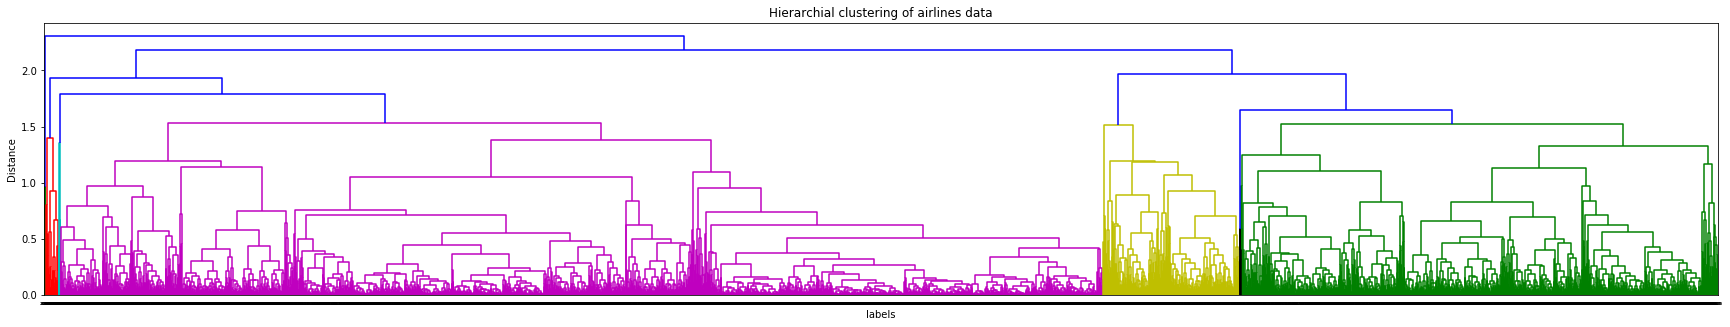

In [13]:
plt.figure(figsize=(30,5));
plt.title('Hierarchial clustering of airlines data')
plt.xlabel('labels')
plt.ylabel('Distance')

sch.dendrogram(z,
              
              leaf_rotation=0,
              leaf_font_size=4)

plt.show()


## Performing Hierarchial Clustering 

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
h_clust=AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='euclidean')

In [49]:
df2=h_clust.fit(norm_data)

In [50]:
df2.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [51]:
clust_labels=pd.Series(df2.labels_)

In [52]:
df['clust']=clust_labels

In [53]:
df.head()

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [54]:
df=df.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [55]:
df.head()

,Award?,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,0,1,28143,0,1,1,1,174,1,0,0,7000
1,0,0,2,19244,0,1,1,1,215,2,0,0,6968
2,0,0,3,41354,0,1,1,1,4123,4,0,0,7034
3,0,0,4,14776,0,1,1,1,500,1,0,0,6952
4,1,1,5,97752,0,4,1,1,43300,26,2077,4,6935


## Grouping Clusters by thier mean

In [65]:
df.iloc[:,3:].groupby(df.clust).mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,
0,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756
2,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356
4,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132


## Performing KMeans Clustering

In [34]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist


## Scree plot 

([<matplotlib.axis.XTick at 0x22637ec0b38>,
 <a list of 23 Text xticklabel objects>)

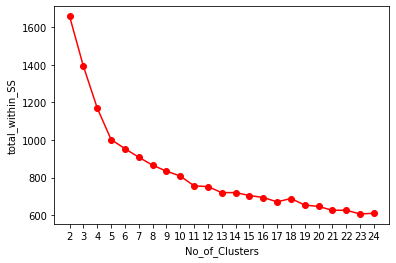

In [46]:
k=list(range(2,25))
twss=[]
for i in k :
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(norm_data)
    wss=[]
    for j in range(i):
        wss.append(sum(cdist(
                       norm_data.iloc[kmeans.labels_==j,:],
                       kmeans.cluster_centers_[j].reshape(1,norm_data.shape[1]),
                       "euclidean"))
                  )
                   
    twss.append(sum(wss))   
    
plt.plot(k,twss, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)    
    

In [57]:
model=KMeans(n_clusters=5)

In [58]:
model.fit(norm_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [59]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
df['clust']=md # creating a  new column and assigning it to new column 
df.head()

,Award?,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0,0,1,28143,0,1,1,1,174,1,0,0,7000
1,0,0,2,19244,0,1,1,1,215,2,0,0,6968
2,0,0,3,41354,0,1,1,1,4123,4,0,0,7034
3,0,0,4,14776,0,1,1,1,500,1,0,0,6952
4,1,3,5,97752,0,4,1,1,43300,26,2077,4,6935


## Grouping Clusters by thier mean

In [60]:
df.iloc[:,2:].groupby(df.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,1183.362903,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115
1,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756
2,1840.462783,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398
3,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356
4,3204.917636,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132
